In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bnb_df = pd.read_csv("AB_NYC_2019.csv")
bnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
neighborhood_df = bnb_df.loc[:, ['neighbourhood', 'price']].groupby(['neighbourhood']).mean()
neighborhood_df

,price
neighbourhood,
Allerton,87.595238
Arden Heights,67.250000
Arrochar,115.000000
Arverne,171.779221
Astoria,117.187778
...,...
Windsor Terrace,138.993631
Woodhaven,67.170455
Woodlawn,60.090909


In [4]:
bnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
bnb_df.loc[bnb_df.number_of_reviews == 0].shape

(10052, 16)

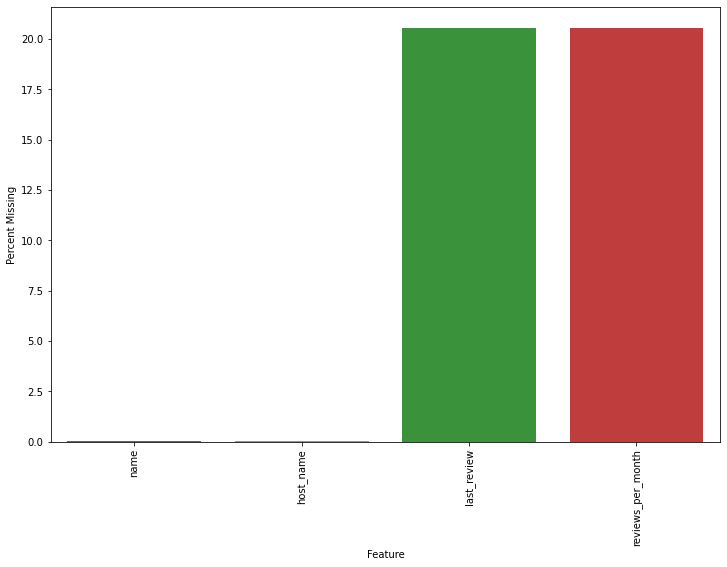

In [6]:
#get percentage missing 
def percentage_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_missing = percentage_missing(bnb_df)

plt.figure(figsize=(12,8))
sns.barplot(x= percent_missing.index, y= percent_missing)
plt.ylabel('Percent Missing')
plt.xlabel('Feature')
plt.xticks(rotation=90); #more readable x label

In [7]:
bnb_clean_df = bnb_df
bnb_clean_df
bnb_clean_df.drop(columns=['last_review', 'reviews_per_month', 'number_of_reviews'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,6,2


In [8]:
bnb_df['lat_from_central'] = bnb_df['latitude'] - 40.758
bnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,lat_from_central
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,-0.11051
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,-0.00438
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0.05102
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,-0.07286
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.04051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,-0.07947
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,-0.05616
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,0.05675
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,-0.00049


In [9]:
bnb_df.loc[:, ['lat_from_central']].mean()

lat_from_central   -0.029051
dtype: float64

In [10]:
bnb_df['lat_from_central'] * 1000
bnb_df['1000_lat_from_central'] = bnb_df['lat_from_central'] * 1000
bnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,lat_from_central,1000_lat_from_central
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,-0.11051,-110.51
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,-0.00438,-4.38
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0.05102,51.02
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,-0.07286,-72.86
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.04051,40.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,-0.07947,-79.47
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,-0.05616,-56.16
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,0.05675,56.75
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,-0.00049,-0.49


In [11]:
nb_group_df = bnb_df.loc[:, ['neighbourhood_group', 'price']].groupby(['neighbourhood_group']).mean()
nb_group_df

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


<AxesSubplot:xlabel='neighbourhood_group'>

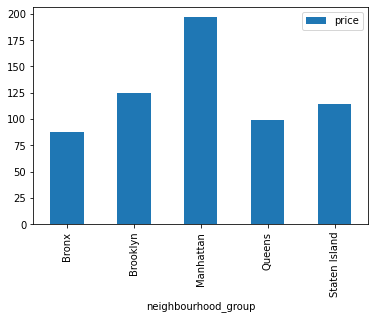

In [12]:
nb_group_df.plot(kind='bar')

In [13]:
room_df = bnb_df.loc[:, ['room_type', 'price']].groupby(['room_type']).mean()
room_df

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


<AxesSubplot:xlabel='room_type'>

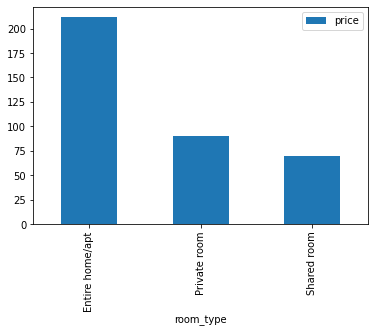

In [14]:
room_df.plot(kind='bar')

In [15]:
room_nb_df = bnb_df.loc[:, ['room_type', 'neighbourhood_group', 'price']].groupby(['room_type', 'neighbourhood_group']).mean()
room_nb_df

price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.506596
                Brooklyn             178.327545
                Manhattan            249.239109
                Queens               147.050573
                Staten Island        173.846591
Private room    Bronx                 66.788344
                Brooklyn              76.500099
                Manhattan            116.776622
                Queens                71.762456
                Staten Island         62.292553
Shared room     Bronx                 59.800000
                Brooklyn              50.527845
                Manhattan             88.977083
                Queens                69.020202
                Staten Island         57.444444

<AxesSubplot:xlabel='room_type,neighbourhood_group'>

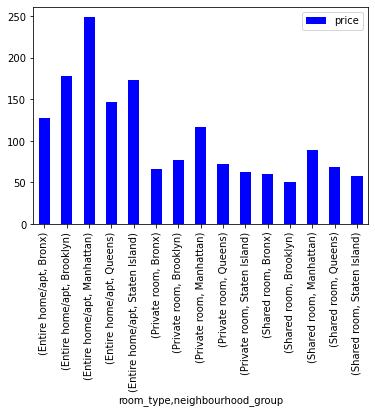

In [16]:
color_list = ['b', 'g', 'r', 'c']
room_nb_df.plot(kind='bar', color=color_list)

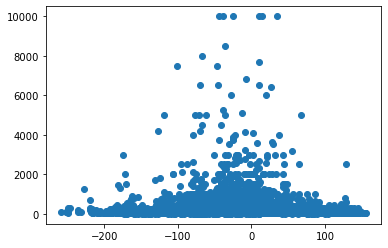

In [17]:
plt.scatter('1000_lat_from_central', 'price', data=bnb_df)

In [18]:
bnb_df.loc[:, ['calculated_host_listings_count']]

,calculated_host_listings_count
0,6
1,2
2,1
3,1
4,1
...,...
48890,2
48891,2
48892,1
48893,6


<AxesSubplot:>

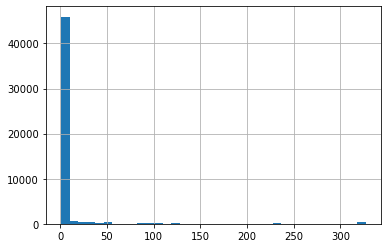

In [19]:
bnb_df['calculated_host_listings_count'].hist(bins=36)

In [25]:
mean = bnb_df['calculated_host_listings_count'].mean()
std = bnb_df['calculated_host_listings_count'].std()
std
mean + 3 * std

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: calculated_host_listings_count, Length: 48895, dtype: bool

In [26]:
bnb_df['calculated_host_listings_count'] > mean + 3 * std

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: calculated_host_listings_count, Length: 48895, dtype: bool

In [79]:
y = bnb_df['price']
x = bnb_df[['room_type', 'minimum_nights']]
x['nb_room'] = ''
x

<ipython-input-79-9215a9646888>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['nb_room'] = ''


,room_type,minimum_nights,nb_room
0,Private room,1,
1,Entire home/apt,1,
2,Private room,3,
3,Entire home/apt,1,
4,Entire home/apt,10,
...,...,...,...
48890,Private room,2,
48891,Private room,4,
48892,Entire home/apt,10,
48893,Shared room,1,


In [78]:
for index, row in x.iterrows():
    #print(row['room_type'], row['minimum_nights'])
    #print(row['room_type'] == 'Private room')
    #print(index)
    if row['room_type'] == 'Private room': 
        x.at[index, 'room_private'] = 1
    if row['room_type'] == 'Entire home/apt': 
        x.at[index, 'room_entire'] = 1
print(x)

      neighbourhood_group        room_type  minimum_nights nb_room
0                Brooklyn     Private room               1       1
1               Manhattan  Entire home/apt               1       1
2               Manhattan     Private room               3       1
3                Brooklyn  Entire home/apt               1       1
4               Manhattan  Entire home/apt              10       1
...                   ...              ...             ...     ...
48890            Brooklyn     Private room               2       1
48891            Brooklyn     Private room               4       1
48892           Manhattan  Entire home/apt              10       1
48893           Manhattan      Shared room               1       1
48894           Manhattan     Private room               7       1

[48895 rows x 4 columns]


In [77]:
x

,neighbourhood_group,room_type,minimum_nights,nb_room
0,Brooklyn,Private room,1,1
1,Manhattan,Entire home/apt,1,1
2,Manhattan,Private room,3,1
3,Brooklyn,Entire home/apt,1,1
4,Manhattan,Entire home/apt,10,1
...,...,...,...,...
48890,Brooklyn,Private room,2,1
48891,Brooklyn,Private room,4,1
48892,Manhattan,Entire home/apt,10,1
48893,Manhattan,Shared room,1,1
